## Imports 
<li> Import Packages</li>
<li> Load Dataset

In [2]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

## Load Dataset

In [3]:
# load the dataset into a dataframe
data = pd.read_csv('data/raw/HR_data.csv')

# Display few rows of the dataframe
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration

<li> Understanding the variables
<li> Data Cleaning

In [4]:
# basic information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


There are 14999 rows and 10 columns among them, 8 are numerical and rest are object type. The dataset doesn't contains any missing values.

#### Descriptive statistics about the data

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<h3> Key Insights </h3>

The mean satisfication level is 0.612, which show satisfaction in moderation among the workforce. The satisfaction levels range from 0.09 to 1.
 <h3> Other Insights </h3>

 <li>The average number of projects an employee is involved in: 3.8 projects on average, but some employees work on as few as 2 or as many as 7.

 <li>The average number of monthly working hours: The average is around 201 hours, with some employees working significantly more.



In [6]:
# Display all column names

data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
## Check for Dublicates
data.duplicated().sum()

3008

Data contains 3008 duplicates rows.

In [10]:
duplicates = data[data.duplicated()]
duplicates.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The above output shows the 1st five occurance of rows that are dublicated in the dataframe. It's not that likely for two employees to report exact same responses for every column so I am gonna proceed with dropping them.

In [12]:
# drop dublicates and saving into new variable

df1 = data.drop_duplicates(keep = 'first')

df1.head() # display the few rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Check for Outliers

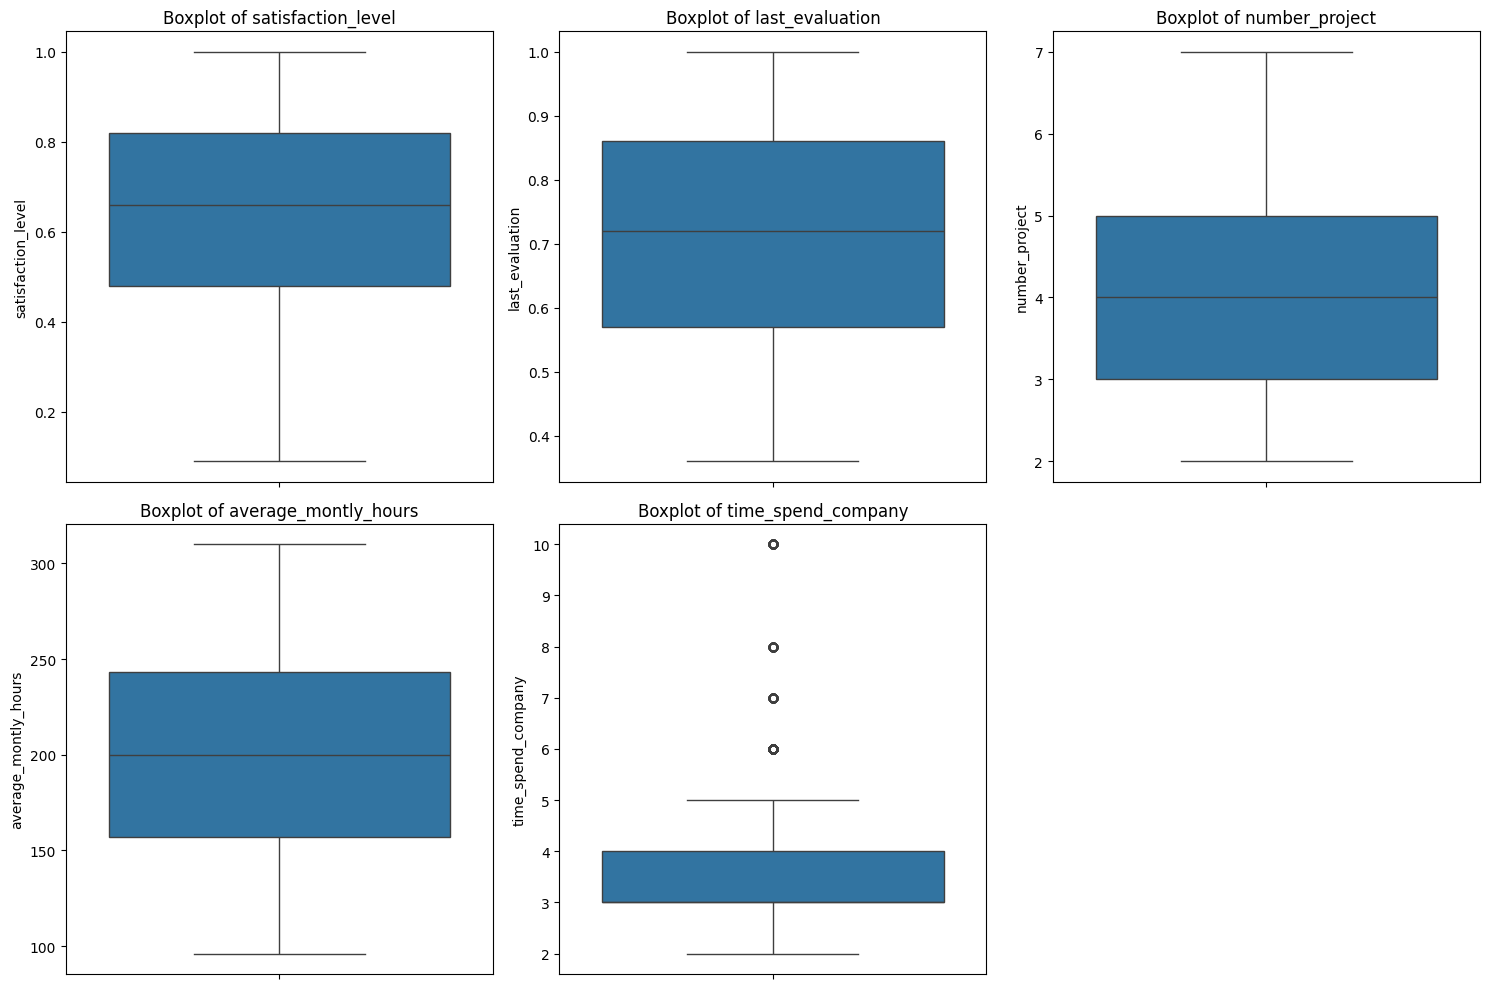

In [14]:

# Select numerical columns for visualization
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 
                   'average_montly_hours', 'time_spend_company']


# create a boxplot to visualize the outliers

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df1[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()



The above plots depicts that there are outliers in the time_spend_company variable.
let's explore further

#### Remove outliers
Since Logistic Regression(LR) is sensitive to outliers and I am gonna use LR for prediction, I am going to remove the outliers.

In [16]:
# Computing the 25th and 75th percentile value in time_spend_company

Q1 = df1['time_spend_company'].quantile(0.25)
Q3 = df1['time_spend_company'].quantile(0.75)

# computing interquartile range
iqr = Q3 -Q1

## Defining the upper limit and lower limit

upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr


df_clean = df1[(df1['time_spend_company'] >= lower_limit) & (df1['time_spend_company'] <= upper_limit)]
print(f'Original rows: {len(df1)}')
print(f"Number of rows after removing outliers: {len(df_clean)}")

Original rows: 11991
Number of rows after removing outliers: 11167


## Further Exploration

In [17]:
# lets understand how many employees lefta and how many stayed in the company

df_clean['left'].value_counts(normalize = True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

#### Data Visualizations

In this step we will try to understand the relationship between different independent variables and the dependent variable i.e 'left'. We will try to explore the impact of different features causing the employee to leave or stay.

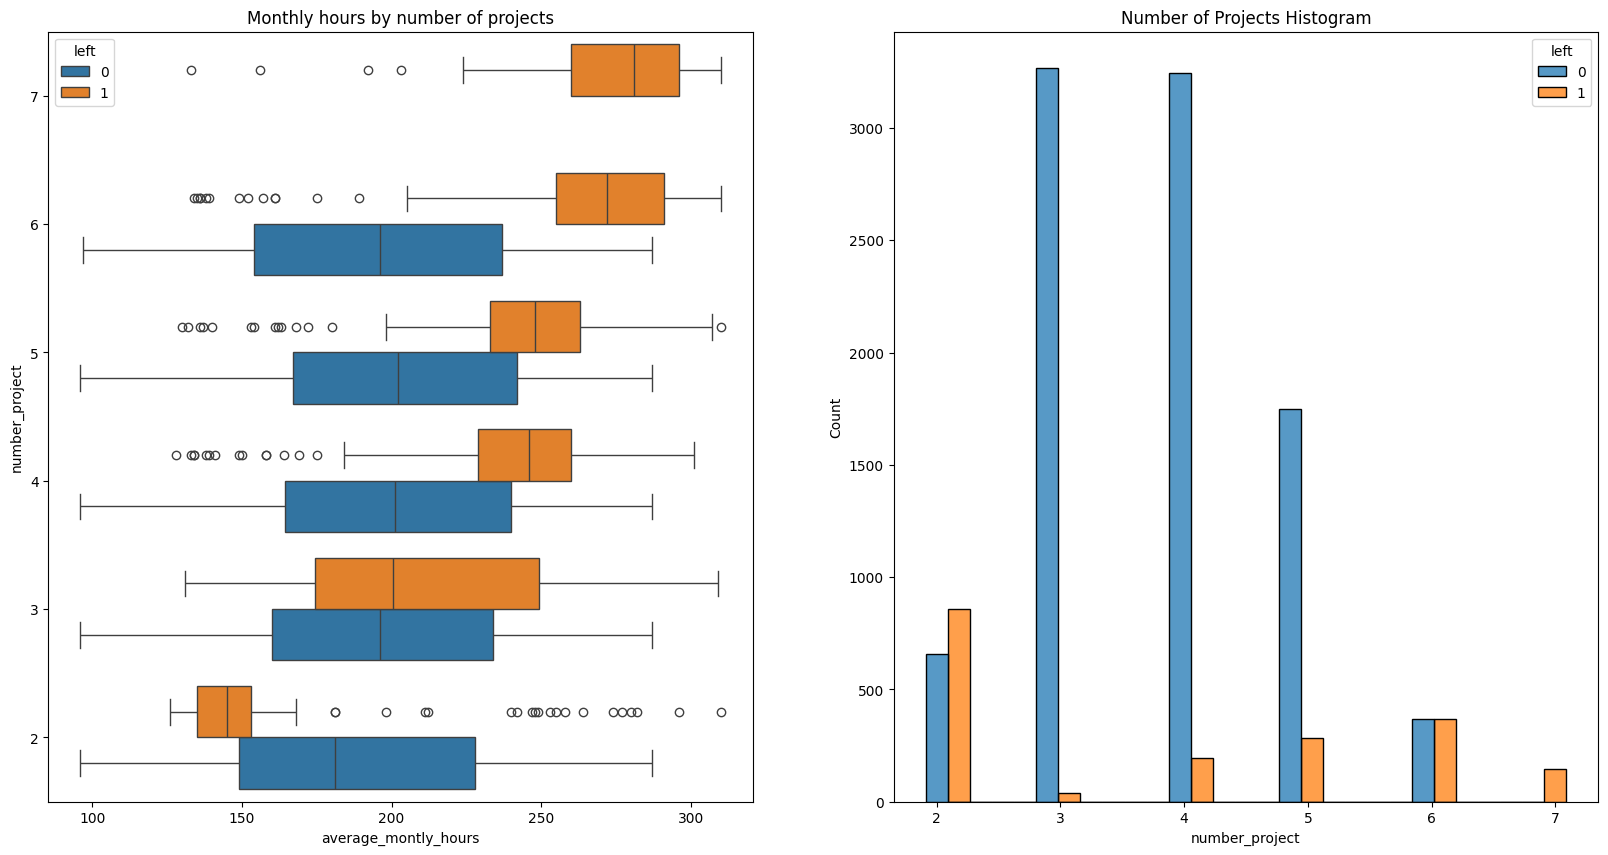

In [20]:
# Set Figure and axes
fig, ax = plt.subplots(1,2, figsize=( 20, 10))

# boxplot showing 'average_monthly_hours' distribution for 'number_projects', comparing employees who stayed vs who left

sns.boxplot(data = df_clean, x = 'average_montly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')

# Histogram showing distribution of 'number_projects' comparing employes who left vs stayed
emp_stay = df_clean[df_clean['left'] == 0]['number_project']
emp_left = df_clean[df_clean['left'] == 1]['number_project']
sns.histplot(data = df_clean, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 2, ax = ax[1])
ax[1].set_title('Number of Projects Histogram')

# show plots
plt.show()

Here are the few things from the plot:
1) Those employee eho worked much less than the peers and those who worked much more left the company. 
2) Everyone with 7 projects left the company. Employees with 6projects and working in between around 255 and 295 hours left the company.
3) The optimal number of project to work seems to be 3-4.

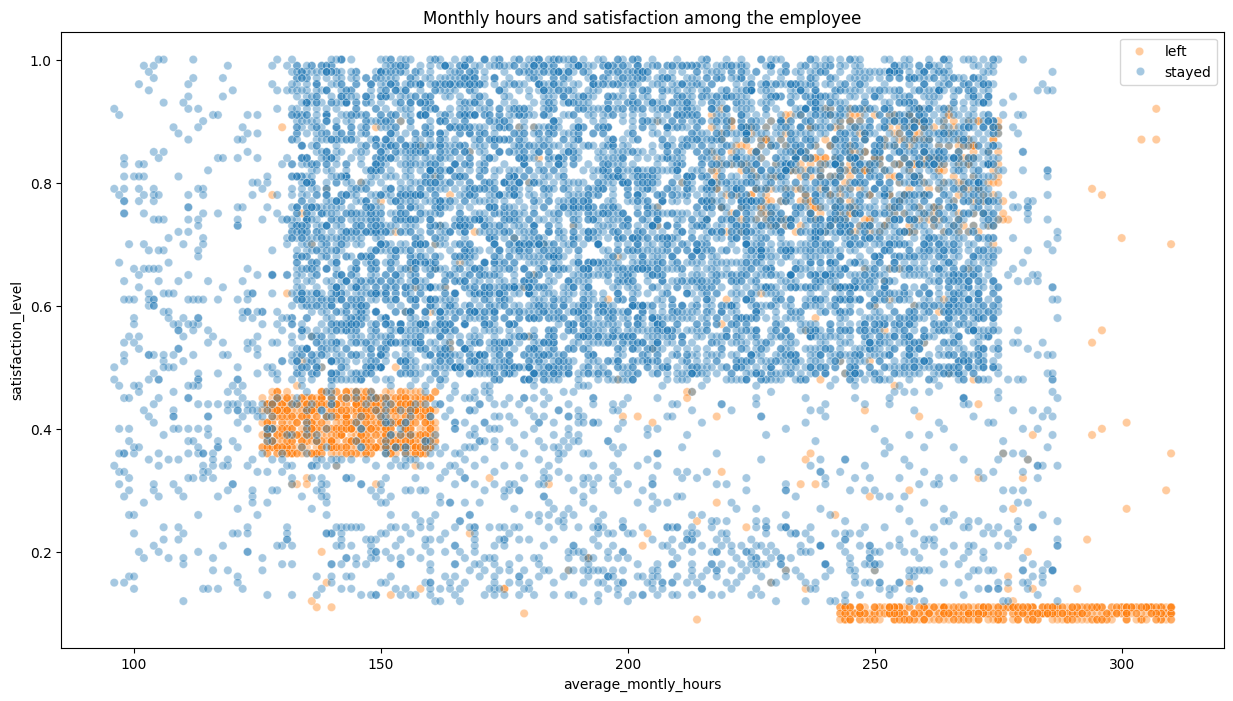

In [27]:
## Lets examine the statisfaction level witth the monthly level and see how the employees responded

# Create a scatterplot to compare average montly hours with satisfaction level

plt.figure(figsize = (15, 8))
sns.scatterplot(data = df_clean, x = 'average_montly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4) 
plt.legend(labels = ['left', 'stayed'])
plt.title('Monthly hours and satisfaction among the employee')
plt.show()

The above plots shows that the employee who had the satisfaction level close to zero and were working around 240-350 hours per month left the company. The dissatisfaction might be due to overworking and could be the main reason for them to leave.

We can also see the another population of employee who left, have normal working hours around 140 per month and have the satisfaction level of around 0.4. 

Finally, another group of employee with higher satisfaction level and higher working hours decided to leave.

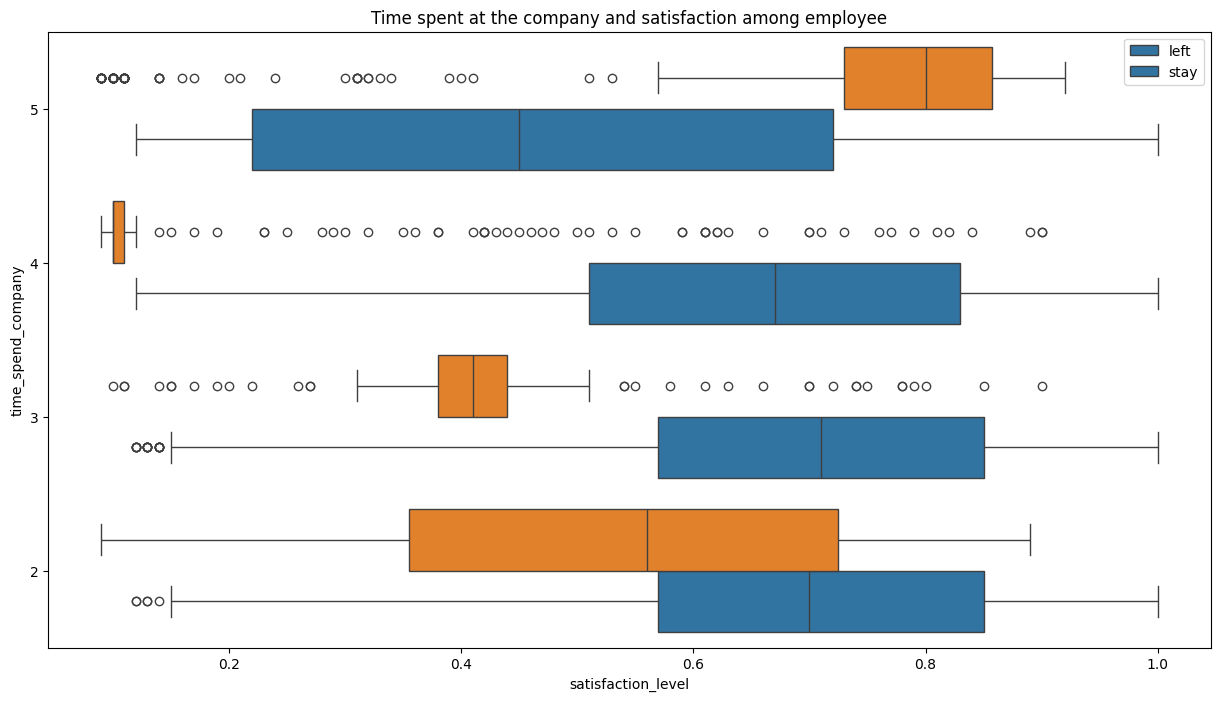

In [32]:
# Employee and time spend in the company

# Create a boxplot to compare within how many years the employees are more likely to leave the company
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
sns.boxplot(data = df_clean, x = 'satisfaction_level', y = 'time_spend_company', hue = 'left', orient = 'h', ax =ax)
plt.legend(labels = ['left', 'stay'])
ax.invert_yaxis()
plt.title('Time spent at the company and satisfaction among employee')
plt.show()

From the above chart, we can observe that employee who had shorter time at company and less satisfaction left the company 

The intresting thing is that all the employee who were working for 5 years with higest satisfaction level left the company. 

Four-year employees who left seems to have low satisfaction level.

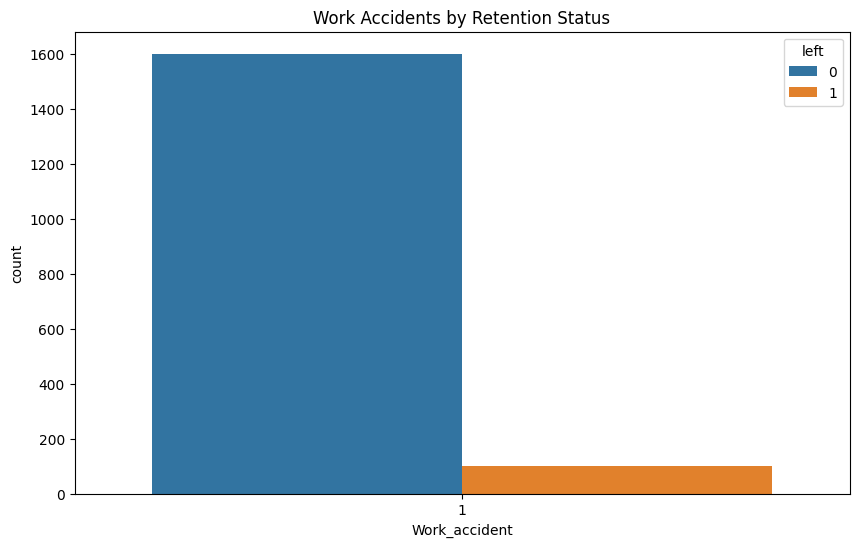

In [39]:
# lets see if there was any impact of employee retention due to work accident
accident = df_clean[df_clean['Work_accident'] == 1]
plt.figure(figsize = (10, 6))
sns.countplot(data=accident, x='Work_accident', hue='left')
plt.title('Work Accidents by Retention Status')
plt.show()


From the above bar plot we can see that there was not much impact of work accident to employees decision to leave.

Text(0.5, 1.0, 'Salary histogram by tenure')

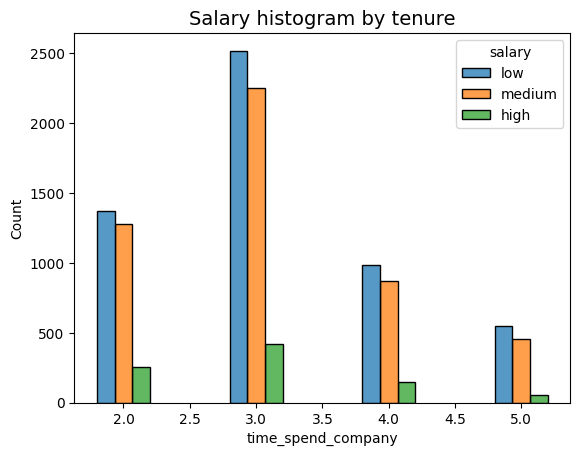

In [43]:
# Create a histogram to see the salary distribution among employees.

sns.histplot(data=df_clean, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4)
plt.title('Salary histogram by tenure', fontsize='14')
plt.show()

The salary pattern looks similar regardless of time spent on a company. 

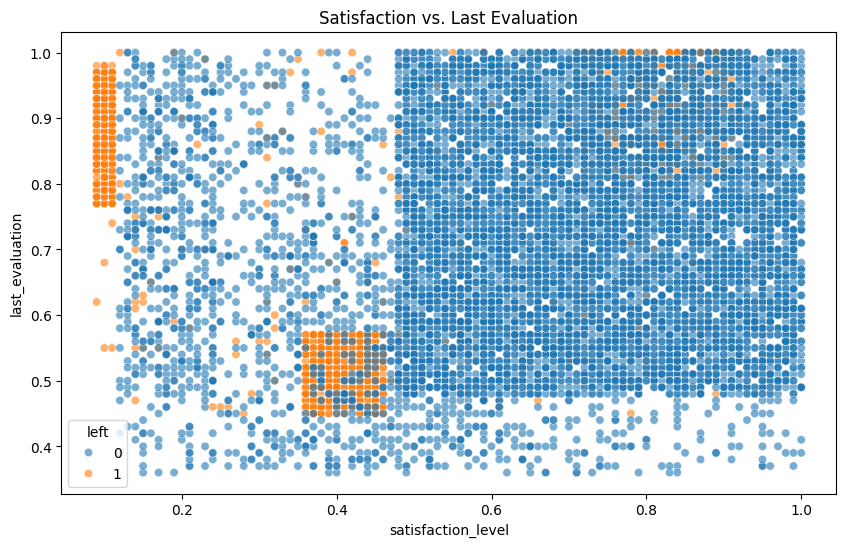

In [45]:
# lets check if there is any trend in performance reviews vs. satisfaction
plt.figure(figsize = (10, 6))
sns.scatterplot(data=df_clean, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.6)
plt.title('Satisfaction vs. Last Evaluation')
plt.show()

The above chart shows that there werer 3 groups of employee who left the company:
1) those who were highly evaulated but with very low satisfaction.
2) those whose evaulation score was arounf 0.5 and satisfaction below average.
3) The last one with high satisfaction and very high evaulation score.

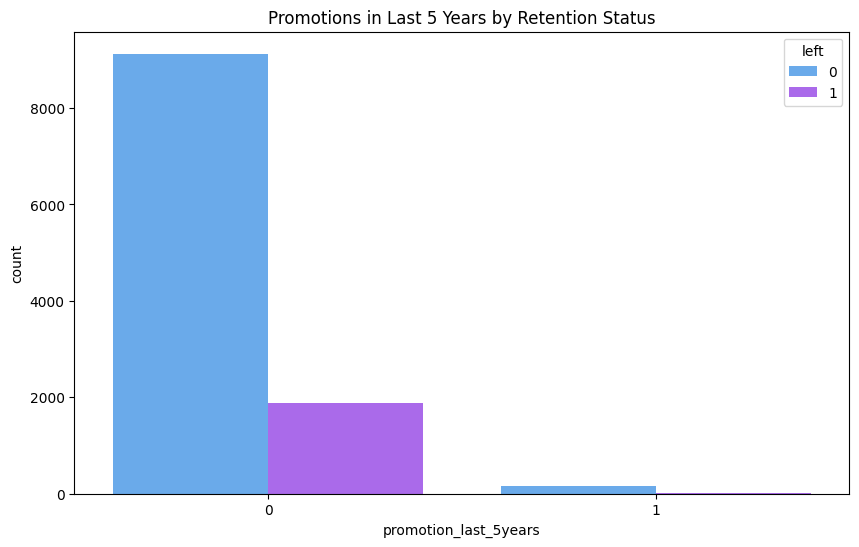

In [47]:
# lets compare the employee who had promotion and didn't in retention.

# create a countplot to see if lack of pormotion impacts employee retention
plt.figure(figsize = (10,6))
sns.countplot(data=df_clean, x='promotion_last_5years', hue='left', palette='cool')
plt.title('Promotions in Last 5 Years by Retention Status')
plt.show()

Seems like there was very few pormotion in the company. 

In [58]:
total_pormotion = df_clean[df_clean['promotion_last_5years'] == 1]
left_pormoted = total_pormotion[total_pormotion['left']==1]

print(f'Total number of employee pormoted: {total_pormotion.shape[0]}')
print(f'Who left and was pormoted: {left_pormoted}')



Total number of employee pormoted: 161
